 ## Addition of two numbers using ML

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data

,x,y,sum
0,2.0,2.0,4.0
1,1.0,1.0,2.0
2,3.0,3.0,6.0
3,4.0,4.0,8.0
4,5.0,5.0,10.0
5,7.0,7.0,14.0
6,8.0,8.0,16.0
7,9.0,9.0,18.0
8,10.0,10.0,20.0
9,12.0,12.0,24.0


In [4]:
data.head()

,x,y,sum
0,2.0,2.0,4.0
1,1.0,1.0,2.0
2,3.0,3.0,6.0
3,4.0,4.0,8.0
4,5.0,5.0,10.0


In [5]:
data.tail()

,x,y,sum
15,15.0,15.0,30.0
16,17.0,17.0,34.0
17,19.0,19.0,38.0
18,20.0,20.0,40.0
19,22.0,22.0,44.0


In [6]:
data.shape

(20, 3)

#### To identify whether there are any missing values in the data set

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
 2   sum     20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


## Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt

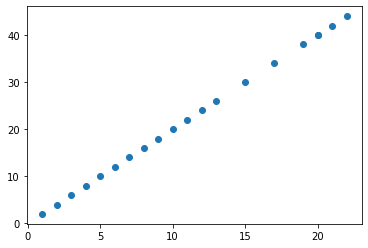

In [9]:
plt.scatter(data['x'],data['sum'])

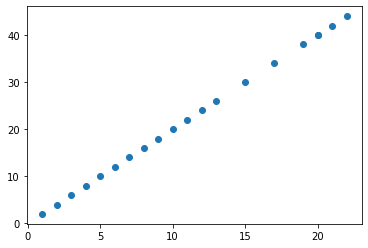

In [10]:
plt.scatter(data['y'],data['sum'])

#### Store feature matrix in X and target in vector y

In [11]:
X = data[['x','y']]

In [12]:
y = data['sum']

#### split the data set as training set and testing set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

#### Training set

In [18]:
X_train

,x,y
3,4.0,4.0
18,20.0,20.0
16,17.0,17.0
13,13.0,13.0
2,3.0,3.0
9,12.0,12.0
19,22.0,22.0
4,5.0,5.0
12,21.0,21.0
7,9.0,9.0


### Train the model

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Model prediction performance

In [20]:
model.score(X_train,y_train)
model.score(X_test,y_test)

1.0

#### Compare the results

In [21]:
y_pred = model.predict(X_test)
y_pred

array([ 4., 38., 30.,  2., 20., 14., 40.])

In [22]:
y_test

0      4.0
17    38.0
15    30.0
1      2.0
8     20.0
5     14.0
11    40.0
Name: sum, dtype: float64

In [23]:
df = pd.DataFrame({'Actual':y_test,'prediction':y_pred})
df

,Actual,prediction
0,4.0,4.0
17,38.0,38.0
15,30.0,30.0
1,2.0,2.0
8,20.0,20.0
5,14.0,14.0
11,40.0,40.0


### Prediction on new samples

In [25]:
model.predict([[100,82]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([182.])

#### Save the model using joblib

In [27]:
import joblib
joblib.dump(model,'model_joblib')


['model_joblib']

#### Load the model

In [29]:
model = joblib.load('model_joblib')
model.predict([[23,45]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.])

### Training the entire data set

In [30]:
X = data[['x','y']]
y = data['sum']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
import joblib
joblib.dump(model,'model_joblib')
model = joblib.load('model_joblib')
model.predict([[23,45]])


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.])

In [ ]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    
    model = joblib.load('model_joblib')
    result = model.predict([[p1,p2]])
    
    Label(master,text='sum is = ').grid(row=4)
    Label(master,text='sum is = ').grid(row=4)


    print("sum is ",result)
    

from tkinter import*
import joblib
master = Tk()
master.title("Addition of two numbers using ML")
label = Label(master,text="Addition of two numbers using ML",bg ='black',fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter first number").grid(row=1)
Label(master,text="Enter second number").grid(row=2)

e1=Entry(master)
e2=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='predict',command=show_entry_fields).grid()

mainloop()

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


sum is  [558.]
